In [1]:
## Packages
## For frame extraction
from pytube import YouTube
import os
import cv2
import numpy as np
import math
import shutil
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## For image comparison
import glob
from skimage import io
from skimage.metrics import structural_similarity as ssim

## For image segmentation
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese, morphological_geodesic_active_contour,
                                inverse_gaussian_gradient, checkerboard_level_set)

# For clustering
from sklearn.cluster import KMeans

# resize image
from skimage.transform import resize

In [ ]:
## Pytube had a glitch in their package which disables users from being able to download YouTube video
### this version of PyTube was found to fix the issue
#### fix found from:https://github.com/pytube/pytube/issues/1060
#####https://stackoverflow.com/questions/67614883/pytube-givng-an-http-error-404-not-found-error-anyone-knows-how-to-fix-this

##pip install git+https://github.com/Zeecka/pytube@fix_1060

## UPDATE: as of 8/9/21. This link is no longer needed. The Pytube glitch is fixed.

In [ ]:
### Videos:
https://www.youtube.com/watch?v=cWOkHQXw0JQ # Super Mario Bros Gameplay
    
https://www.youtube.com/watch?v=Pp2aMs38ERY # Donkey Kong Gameplay

https://www.youtube.com/watch?v=8vVEDksr6fk # PacMan gameplay

In [ ]:
### Step 1: Image Acquisition/ frame extraction

In [3]:
video = YouTube("https://www.youtube.com/watch?v=cWOkHQXw0JQ")
video.streams.filter(file_extension = "mp4").all()
video.streams.get_by_itag(18).download()

<ipython-input-3-45145b0ab91c>:2: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  video.streams.filter(file_extension = "mp4").all()


'C:\\Users\\SLL007\\Super Mario Bros - Full Game Walkthrough.mp4'

In [4]:
class FrameExtraction():
    def __init__(self, video_path):
        self.video_path = video_path
        self.vid_cap = cv2.VideoCapture(video_path)
        self.n_frames = int(self.vid_cap.get(cv2.CAP_PROP_FRAME_COUNT))
        self.fps = int(self.vid_cap.get(cv2.CAP_PROP_FPS))
        
    def get_n_images(self, every_x_frame):
        n_images = math.floor(self.n_frames / every_x_frame) + 1
        print(f'Extracting every {every_x_frame} (nd/rd/th) frame would result in {n_images} images.')
        
    def extract_frames(self, every_x_frame, img_name, dest_path=None, img_ext = '.jpg'):
        if not self.vid_cap.isOpened():
            self.vid_cap = cv2.VideoCapture(self.video_path)
        
        if dest_path is None:
            dest_path = os.getcwd()
        else:
            if not os.path.isdir(dest_path):
                os.mkdir(dest_path)
                print(f'Created the following directory: {dest_path}')
        
        frame_cnt = 0
        img_cnt = 0

        while self.vid_cap.isOpened():
            
            success,image = self.vid_cap.read() 
            
            if not success:
                break
            
            if frame_cnt % every_x_frame == 0:
                img_path = os.path.join(dest_path, ''.join([img_name, '_', str(img_cnt), img_ext]))
                cv2.imwrite(img_path, image)  
                img_cnt += 1
                
            frame_cnt += 1
        
        self.vid_cap.release()
        cv2.destroyAllWindows()
        
# Reference for code: https://towardsdatascience.com/the-easiest-way-to-download-youtube-videos-using-python-2640958318ab

In [6]:
vid = FrameExtraction('C:\\Users\\SLL007\\Super Mario Bros - Full Game Walkthrough.mp4')

In [17]:
vid.get_n_images(every_x_frame=2000)

Extracting every 2000 (nd/rd/th) frame would result in 23 images.


In [21]:
vid.extract_frames(every_x_frame=2000, 
                  img_name='mario', 
                  dest_path='mario_images')

In [ ]:
//////

In [ ]:
### Step 2: Image comparison

In [22]:
file = "C:/Users/SLL007/Mario_images/*.jpg"
glob.glob(file)

['C:/Users/SLL007/Mario_images\\mario_0.jpg',
 'C:/Users/SLL007/Mario_images\\mario_1.jpg',
 'C:/Users/SLL007/Mario_images\\mario_10.jpg',
 'C:/Users/SLL007/Mario_images\\mario_11.jpg',
 'C:/Users/SLL007/Mario_images\\mario_12.jpg',
 'C:/Users/SLL007/Mario_images\\mario_13.jpg',
 'C:/Users/SLL007/Mario_images\\mario_14.jpg',
 'C:/Users/SLL007/Mario_images\\mario_15.jpg',
 'C:/Users/SLL007/Mario_images\\mario_16.jpg',
 'C:/Users/SLL007/Mario_images\\mario_17.jpg',
 'C:/Users/SLL007/Mario_images\\mario_18.jpg',
 'C:/Users/SLL007/Mario_images\\mario_19.jpg',
 'C:/Users/SLL007/Mario_images\\mario_2.jpg',
 'C:/Users/SLL007/Mario_images\\mario_20.jpg',
 'C:/Users/SLL007/Mario_images\\mario_21.jpg',
 'C:/Users/SLL007/Mario_images\\mario_22.jpg',
 'C:/Users/SLL007/Mario_images\\mario_3.jpg',
 'C:/Users/SLL007/Mario_images\\mario_4.jpg',
 'C:/Users/SLL007/Mario_images\\mario_5.jpg',
 'C:/Users/SLL007/Mario_images\\mario_6.jpg',
 'C:/Users/SLL007/Mario_images\\mario_7.jpg',
 'C:/Users/SLL007/Mar

In [23]:
images = [cv2.imread(image) for image in glob.glob(file)]

In [27]:
N = len(images)
similarity= np.zeros([N,N])

for i in range(N):
    for j in range(N):
        similarity[i][j] = ssim(images[i], images[j], multichannel = True)

In [28]:
print(similarity)

[[1.         0.27244338 0.28745764 0.26473969 0.88035754 0.65365718
  0.70612468 0.5616688  0.26447422 0.40583105 0.28812498 0.26621298
  0.26521812 0.26663809 0.28812723 0.61531712 0.26798174 0.40392238
  0.28823382 0.74885822 0.70524161 0.66014934 0.7345547 ]
 [0.27244338 1.         0.60328312 0.73980848 0.35610244 0.362201
  0.36494269 0.37667189 0.74117708 0.59738737 0.60658454 0.75446773
  0.70443277 0.74387499 0.60158865 0.36521533 0.74611891 0.57579311
  0.60693596 0.37786199 0.37234228 0.36393262 0.39316512]
 [0.28745764 0.60328312 1.         0.61805005 0.3720393  0.36850489
  0.38943097 0.42431798 0.64961658 0.52506697 0.80184236 0.64721763
  0.64764928 0.63936503 0.71698242 0.37826268 0.60910503 0.52314826
  0.80087378 0.39028428 0.40744665 0.37836981 0.37703835]
 [0.26473969 0.73980848 0.61805005 1.         0.34814507 0.3607243
  0.35816563 0.38838198 0.77394084 0.60925101 0.62461387 0.77678899
  0.7590119  0.7597349  0.60120663 0.36487843 0.76461915 0.59838144
  0.62419421 

In [29]:
def similaritystats(a):
    meansim = np.mean(a)
    minsim = np.min(a)
    maxsim = np.max(a)
    
    print('mean:' + str(meansim))
    print('min:' + str(minsim))
    print('max:' + str(maxsim))

In [30]:
# 1.0 = exact similarity; 0 = no similarity
similaritystats(similarity)

mean:0.5411573642756397
min:0.26447421712136193
max:1.0


In [ ]:
# The mean of 0.54 shows that images are somewhat similar, and the lowest is 0.26 which is above the lower threshold of 0.2
## The max is 1.0 which is bound to occur when an image is compared to itself.

In [31]:
# locating the second largest number
simflat = similarity.flatten()
simflat.sort()
simflat

array([0.26447422, 0.26447422, 0.26473969, 0.26473969, 0.26521812,
       0.26521812, 0.26621298, 0.26621298, 0.26663809, 0.26663809,
       0.26798174, 0.26798174, 0.27244338, 0.27244338, 0.28745764,
       0.28745764, 0.28812498, 0.28812498, 0.28812723, 0.28812723,
       0.28823382, 0.28823382, 0.34762864, 0.34762864, 0.34814507,
       0.34814507, 0.34874896, 0.34874896, 0.34954618, 0.34954618,
       0.35018098, 0.35018098, 0.35065708, 0.35065708, 0.35607187,
       0.35607187, 0.35610244, 0.35610244, 0.35636934, 0.35636934,
       0.35689343, 0.35689343, 0.35712702, 0.35712702, 0.35726242,
       0.35726242, 0.35753695, 0.35753695, 0.35785625, 0.35785625,
       0.3579216 , 0.3579216 , 0.35797612, 0.35797612, 0.35816563,
       0.35816563, 0.35817453, 0.35817453, 0.35823733, 0.35823733,
       0.35845689, 0.35845689, 0.35913147, 0.35913147, 0.35917041,
       0.35917041, 0.3593524 , 0.3593524 , 0.35942956, 0.35942956,
       0.35986491, 0.35986491, 0.36050364, 0.36050364, 0.36072

In [ ]:
/////

In [ ]:
### Step 3: Image segmentation

In [2]:
def store_evolution_in(lst):
    def _store(x):
        lst.append(np.copy(x))
    return _store

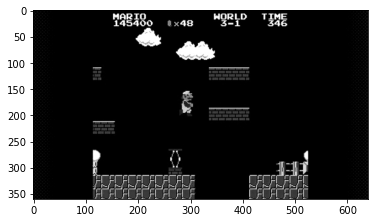

In [3]:
img = cv2.imread("/Users/SLL007/mario_images/mario_6.jpg")
grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # This method works for grayscale images
image = img_as_float(grey)
plt.imshow(image, cmap = 'gray')

In [4]:
init_ls = checkerboard_level_set(image.shape, 6)

# List with results of each iteration
evolution = []

callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image,35, init_level_set=init_ls,
                             smoothing=3, iter_callback=callback)
## the morphological chan vese method allows you to adjust smoothing (above).

Text(0.5, 1.0, 'Morphological ACWE evolution')

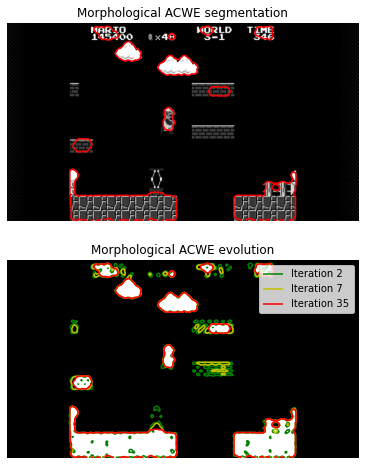

In [5]:
fig, axes = plt.subplots(2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)


ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[7], [0.5], colors='y')
contour.collections[0].set_label("Iteration 7")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 35")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)
# Code reference: https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_morphsnakes.html

In [51]:
## This is the segments placed on a black background
## When this code is run, the image will pop up in a new window and this is screenshotted and saved in documents

for (i,segment) in enumerate(np.unique(ls)):
    mask  = np.zeros(image.shape[:2], dtype = 'uint8')
    mask[ls == segment] = 255
    cv2.imshow('mask', mask)
    cv2.imshow('applied', cv2.bitwise_and(image, image, mask = mask))
    cv2.waitKey(0)

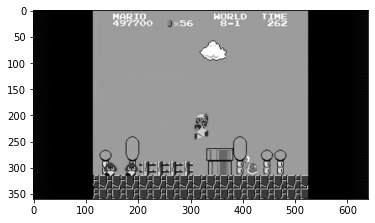

In [53]:
## repeating the segmentation steps with more images
img = cv2.imread("/Users/SLL007/mario_images/mario_19.jpg")
grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
image = img_as_float(grey)
plt.imshow(image, cmap = 'gray')

In [55]:
init_ls = checkerboard_level_set(image.shape, 6)

evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image,35, init_level_set=init_ls,
                             smoothing=3, iter_callback=callback)

Text(0.5, 1.0, 'Morphological ACWE evolution')

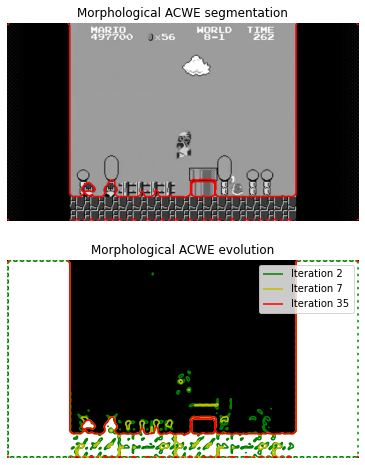

In [56]:
fig, axes = plt.subplots(2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)


ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[7], [0.5], colors='y')
contour.collections[0].set_label("Iteration 7")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 35")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)

In [57]:
## the last image did not work, so smoothing will be adjusted to see if it helps.

init_ls = checkerboard_level_set(image.shape, 6)

evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image,35, init_level_set=init_ls,
                             smoothing=1, iter_callback=callback)

Text(0.5, 1.0, 'Morphological ACWE evolution')

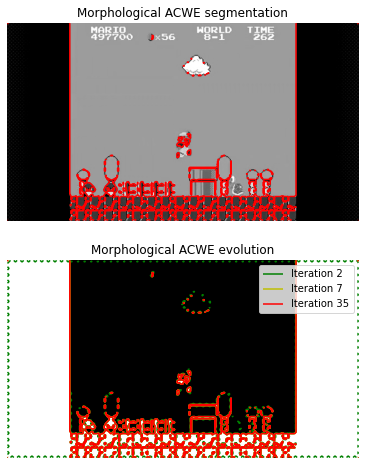

In [58]:
fig, axes = plt.subplots(2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)


ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[7], [0.5], colors='y')
contour.collections[0].set_label("Iteration 7")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 35")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)

Text(0.5, 1.0, 'Morphological ACWE evolution')

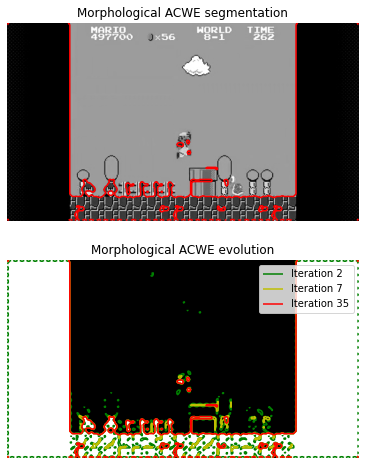

In [60]:
# Smoothing is adjusted again 
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image,35, init_level_set=init_ls,
                             smoothing=2, iter_callback=callback)
fig, axes = plt.subplots(2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)


ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[7], [0.5], colors='y')
contour.collections[0].set_label("Iteration 7")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 35")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)

Text(0.5, 1.0, 'Morphological ACWE evolution')

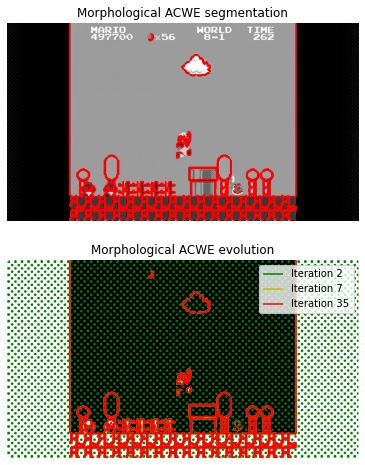

In [61]:
# Smoothing is adjusted again
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image,35, init_level_set=init_ls,
                             smoothing=0, iter_callback=callback)
fig, axes = plt.subplots(2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)


ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[7], [0.5], colors='y')
contour.collections[0].set_label("Iteration 7")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 35")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)

In [ ]:
## The last image was not segmented correctly. This is likely because Mario is a very similar colour to the background.
## Because the last image did not work, segmentation will be attempted on another image.

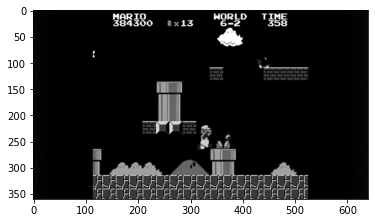

In [62]:
img = cv2.imread("/Users/SLL007/mario_images/mario_14.jpg")
grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
image = img_as_float(grey)
plt.imshow(image, cmap = 'gray')

In [ ]:
## This objects in this image stand out against the background. The segmentation will likely work on this image.

In [67]:
init_ls = checkerboard_level_set(image.shape, 6)

evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image,35, init_level_set=init_ls,
                             smoothing=3, iter_callback=callback)

Text(0.5, 1.0, 'Morphological ACWE evolution')

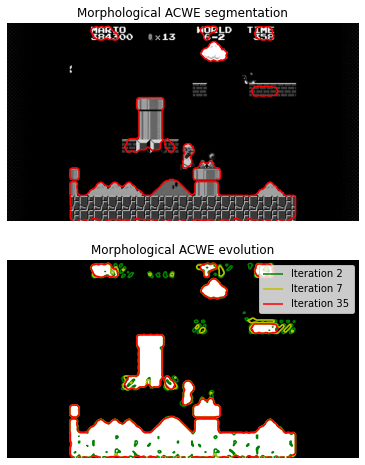

In [68]:
fig, axes = plt.subplots(2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)


ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[7], [0.5], colors='y')
contour.collections[0].set_label("Iteration 7")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 35")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)

In [ ]:
### Segmentation did work on this image

In [69]:
for (i,segment) in enumerate(np.unique(ls)):
    mask  = np.zeros(image.shape[:2], dtype = 'uint8')
    mask[ls == segment] = 255
    cv2.imshow('mask', mask)
    cv2.imshow('applied', cv2.bitwise_and(image, image, mask = mask))
    cv2.waitKey(0)

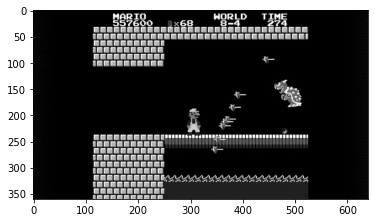

In [6]:
img = cv2.imread("/Users/SLL007/mario_images/mario_22.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
image = img_as_float(gray)
plt.imshow(image, cmap = 'gray')

In [7]:
init_ls = checkerboard_level_set(image.shape, 6)

evolution = []

callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image,35, init_level_set=init_ls,
                             smoothing=3, iter_callback=callback)

Text(0.5, 1.0, 'Morphological ACWE evolution')

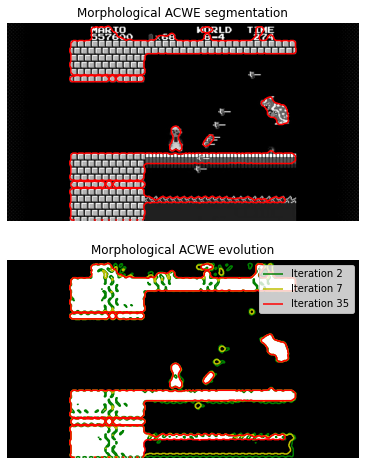

In [8]:
fig, axes = plt.subplots(2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)


ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[7], [0.5], colors='y')
contour.collections[0].set_label("Iteration 7")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 35")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)

In [9]:
# Not perfect, but it worked on this image

for (i,segment) in enumerate(np.unique(ls)):
    mask  = np.zeros(image.shape[:2], dtype = 'uint8')
    mask[ls == segment] = 255
    cv2.imshow('mask', mask)
    cv2.imshow('applied', cv2.bitwise_and(image, image, mask = mask))
    cv2.waitKey(0)

In [ ]:
### Now the segmented images are loaded, and desired objects are cropped from the images.

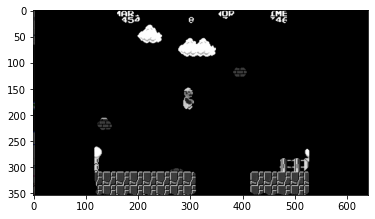

In [2]:
mario = cv2.imread("/Users/SLL007/Documents/marioscreenshot2.png")
plt.imshow(mario)

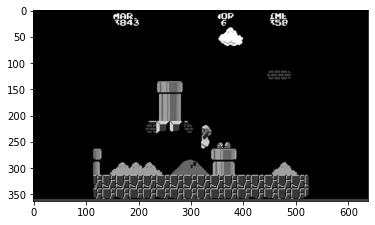

In [3]:
mario2 = cv2.imread("/Users/SLL007/Pictures/Screenshots/Capture.PNG")
plt.imshow(mario2, cmap = 'gray')

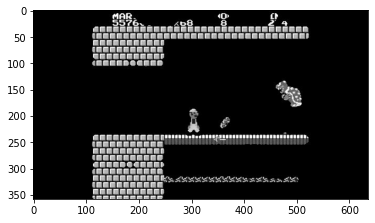

In [4]:
mario3 = cv2.imread("/Users/SLL007/Pictures/Screenshots/mar22.jpg")
plt.imshow(mario3, cmap = 'gray')

In [ ]:
## Now the images will be cropped

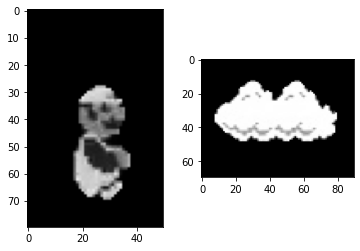

In [5]:
# From the first segmented image
m1 = mario[120:200, 270:320]
cloud = mario[40:110, 270:360]

f, image = plt.subplots(1,2)
image[0].imshow(m1, cmap = 'gray')
image[1].imshow(cloud, cmap = 'gray')

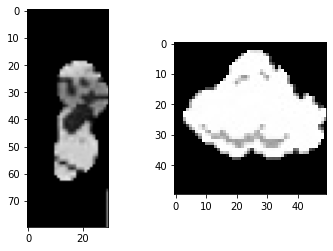

In [6]:
# From the second segmented image
mar2 = mario2[200:280, 310:340]
cloud2 = mario2[30:80, 350:400]

f, image = plt.subplots(1,2)
image[0].imshow(mar2, cmap = 'gray')
image[1].imshow(cloud2, cmap = 'gray')

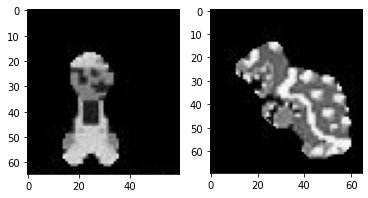

In [7]:
# From the 3rd segmented image
mar3 = (mario3[170:235, 280:340])
bowser = (mario3[120:190, 450:515])

f, image = plt.subplots(1,2)
image[0].imshow(mar3, cmap = 'gray')
image[1].imshow(bowser, cmap = 'gray')

In [23]:
pictures = [m1, cloud, mar2, cloud2, mar3, bowser]

In [24]:
## Save the images into a folder. I created this folder in my documents
dest_path = "C:/Users/SLL007/Documents/mario_seg"

for i in range(len(pictures)):
    filename = dest_path+"/image_"+str(i)+".jpg"
    cv2.imwrite(filename,pictures[i])
    cv2.waitKey(0)

In [ ]:
/////

In [ ]:
### Step 4: Image clustering

In [26]:
# load images
file = "C:/Users/SLL007/Documents/mario_seg/image_*.jpg"
glob.glob(file)

['C:/Users/SLL007/Documents/mario_seg\\image_0.jpg',
 'C:/Users/SLL007/Documents/mario_seg\\image_1.jpg',
 'C:/Users/SLL007/Documents/mario_seg\\image_2.jpg',
 'C:/Users/SLL007/Documents/mario_seg\\image_3.jpg',
 'C:/Users/SLL007/Documents/mario_seg\\image_4.jpg',
 'C:/Users/SLL007/Documents/mario_seg\\image_5.jpg']

In [27]:
images = [cv2.imread(image) for image in glob.glob(file)]

In [28]:
images[0].shape

(80, 50, 3)

In [29]:
# The images load as 3d even though they should be 2d as they are already grayscale images
imgs = []
for i in range(len(images)):
    im = cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY)
    imgs.append(im)

In [31]:
# Checking the size of the images
print(imgs[0].shape)
print(imgs[1].shape)
print(imgs[2].shape)
print(imgs[3].shape)
print(imgs[4].shape)
print(imgs[5].shape)

(80, 50)
(70, 90)
(80, 30)
(50, 50)
(65, 60)
(70, 65)


In [32]:
## images need to be the same size to use SSIM

# Resize the images for distance measure and clustering
# I chose the size based on the smallest image, as it would not disturb the images too much to make them smaller,
## than if you were to make them all larger
ims = []
for i in range(len(imgs)):
    im = resize(imgs[i], (60,70))
    ims.append(im)

In [33]:
# Calculate the similarity between each image and store in array
N = len(ims)
distance_i_j= np.zeros([N,N])

for i in range(N):
    for j in range(N):
        distance_i_j[i][j] = ssim(ims[i], ims[j], multichannel = False)

In [34]:
# Use k means clustering to classify similar images into groups
kmeans=KMeans(n_clusters=3,random_state=0)

kmeans.fit(distance_i_j)

KMeans(n_clusters=3, random_state=0)

In [35]:
# Check the clusters
for i in range(len(ims)):
    print("image %3d belongs to cluster %3d"%(i,kmeans.labels_[i]))

image   0 belongs to cluster   0
image   1 belongs to cluster   1
image   2 belongs to cluster   0
image   3 belongs to cluster   1
image   4 belongs to cluster   0
image   5 belongs to cluster   2


In [ ]:
### The images have been clustered correctly
## Below are all the images plotted to double check that they have been allocated the correct cluster

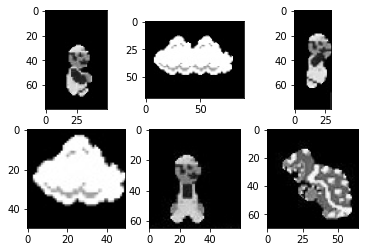

In [36]:
f, image = plt.subplots(2,3)
image[0,0].imshow(imgs[0], cmap = 'gray')
image[0,1].imshow(imgs[1], cmap = 'gray')
image[0,2].imshow(imgs[2], cmap = 'gray')
image[1,0].imshow(imgs[3], cmap = 'gray')
image[1,1].imshow(imgs[4], cmap = 'gray')
image[1,2].imshow(imgs[5], cmap = 'gray')